### Kind of sets taken
We are wondering what kind of sets are taken the most often.

In [8]:
%matplotlib inline
import pandas as pd

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'warmup', 'kostero')))
from classes import *

In [9]:
path = "../data/takes.csv"
frame = pd.read_csv(path)

In [10]:
temp_typ = {}
temp_set = {}
for _,row in frame.iterrows():
    card0 = Card.from_str(row["card0"])
    card1 = Card.from_str(row["card1"])
    card2 = Card.from_str(row["card2"])
    card_set = ",".join(map(lambda x : x.to_str(), sorted([card0,card1,card2])))
    typ = type_of_the_set(card0, card1, card2)
    if card_set not in temp_set.keys():
        temp_set[card_set] = 0
    temp_set[card_set] += 1
    if typ not in temp_typ.keys():
        temp_typ[typ] = 0
    temp_typ[typ] += 1

In [11]:
typ_list = []
for ele in temp_typ.keys():
    typ_list.append({"kind": ele, "times": temp_typ[ele]})
set_list = []
for ele in temp_set.keys():
    set_list.append({"kind": ele, "times": temp_set[ele]})

At first, we are looking how popular is every set (we show the whole distribution, then the most common ten and less common ten).

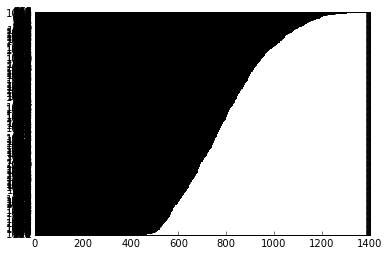

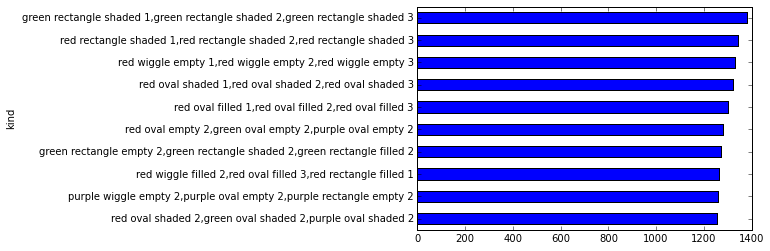

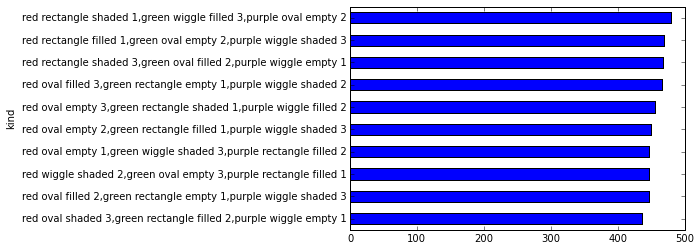

In [12]:
set_frame = pd.DataFrame(set_list)
set_frame = set_frame.sort(["times"])
set_frame.plot(kind="barh", legend=False)

set_frame[-10:].plot(["kind"], kind="barh", legend=False)
set_frame[:10].plot(["kind"], kind="barh", legend=False)

And at the end, we show what kind of sets are taken most often.

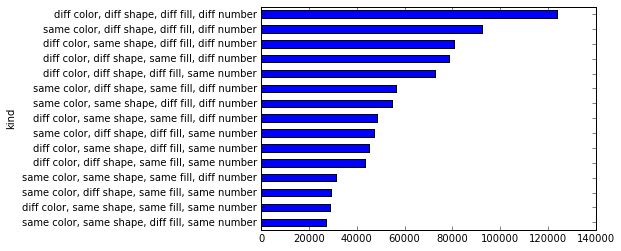

In [13]:
typ_frame = pd.DataFrame(typ_list)
typ_frame = typ_frame.sort(["times"])
typ_frame.plot(["kind"], kind="barh", legend=False)